<a href="https://colab.research.google.com/github/charansanthosh1675/home_assignment1_neural-network/blob/main/Home_Assignment_1_charan_santhosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# CS5720 - Home Assignment 1
# name: gudiseva charan santhosh
# student id : 700776700
# University of Central Missouri


# -----------------------------
# PART 1: Tensor Manipulations
# -----------------------------
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
import datetime

# 1. Create random tensor of shape (4, 6)
tensor = tf.random.uniform((4, 6))
print("Original Tensor:\n", tensor)

# 2. Find rank and shape
print("Rank:", tf.rank(tensor).numpy())
print("Shape:", tensor.shape)

# 3. Reshape to (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print("Reshaped Tensor:\n", reshaped_tensor)

# 4. Transpose to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("Transposed Tensor:\n", transposed_tensor)

# 5. Broadcast and add small tensor (1, 4)
small_tensor = tf.constant([[1.0, 2.0, 3.0, 4.0]])
added_tensor = transposed_tensor + small_tensor
print("After Broadcasting:\n", added_tensor)

print("Broadcasting means TensorFlow stretches the small tensor to match the big one and adds them.")



Original Tensor:
 tf.Tensor(
[[3.82393599e-01 1.83514357e-01 8.81042361e-01 7.63254881e-01
  8.17027569e-01 1.90705061e-01]
 [5.10960460e-01 7.47601986e-01 4.74753618e-01 4.69796419e-01
  3.43517184e-01 3.65156531e-01]
 [8.65499973e-01 2.53416777e-01 7.74809241e-01 6.26621008e-01
  3.82787704e-01 1.17446065e-01]
 [5.49882054e-01 3.21177483e-01 4.84195948e-01 6.06150985e-01
  1.87772632e-01 1.41263008e-04]], shape=(4, 6), dtype=float32)
Rank: 2
Shape: (4, 6)
Reshaped Tensor:
 tf.Tensor(
[[[3.82393599e-01 1.83514357e-01 8.81042361e-01 7.63254881e-01]
  [8.17027569e-01 1.90705061e-01 5.10960460e-01 7.47601986e-01]
  [4.74753618e-01 4.69796419e-01 3.43517184e-01 3.65156531e-01]]

 [[8.65499973e-01 2.53416777e-01 7.74809241e-01 6.26621008e-01]
  [3.82787704e-01 1.17446065e-01 5.49882054e-01 3.21177483e-01]
  [4.84195948e-01 6.06150985e-01 1.87772632e-01 1.41263008e-04]]], shape=(2, 3, 4), dtype=float32)
Transposed Tensor:
 tf.Tensor(
[[[3.82393599e-01 1.83514357e-01 8.81042361e-01 7.6325488

Prediction 1 - MSE: 0.04888888 , CCE: 0.36354804
Prediction 2 - MSE: 0.115555555 , CCE: 0.64598066


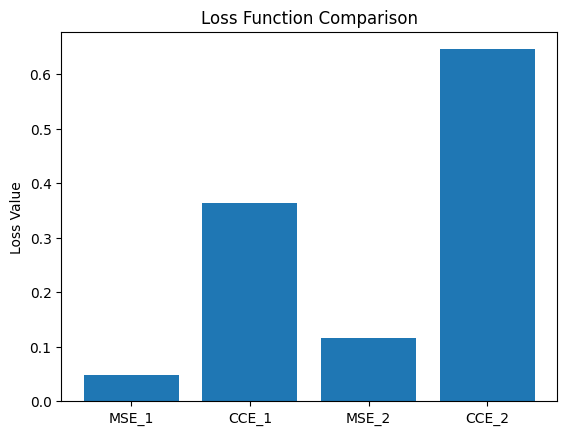

In [ ]:
#TASK 2


# ----------------------------------------
# PART 2: Loss Functions and Visualization
# ----------------------------------------

# True values
y_true = tf.constant([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=tf.float32)

# Predictions
y_pred_1 = tf.constant([[0.8, 0.1, 0.1], [0.1, 0.7, 0.2], [0.2, 0.2, 0.6]], dtype=tf.float32)
y_pred_2 = tf.constant([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0.3, 0.1, 0.6]], dtype=tf.float32)

# Loss functions
mse = MeanSquaredError()
cce = CategoricalCrossentropy()

# Calculate losses
mse_1 = mse(y_true, y_pred_1).numpy()
cce_1 = cce(y_true, y_pred_1).numpy()
mse_2 = mse(y_true, y_pred_2).numpy()
cce_2 = cce(y_true, y_pred_2).numpy()

# Print results
print("Prediction 1 - MSE:", mse_1, ", CCE:", cce_1)
print("Prediction 2 - MSE:", mse_2, ", CCE:", cce_2)

# Plot
labels = ['MSE_1', 'CCE_1', 'MSE_2', 'CCE_2']
losses = [mse_1, cce_1, mse_2, cce_2]
plt.bar(labels, losses)
plt.title("Loss Function Comparison")
plt.ylabel("Loss Value")
plt.show()


In [ ]:
#TASK 3


# -----------------------------------
# PART 3: Neural Network + TensorBoard
# -----------------------------------

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train
model.fit(x_train, y_train, epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])




#TASK 4



# ---------------------------------
# PART 4: Simple Answers to Questions
# ---------------------------------
#  nQ1: What do you observe in accuracy curves?
#  A1: Training accuracy increases. Validation accuracy may stop improving or get worse if overfitting happens.

#  nQ2: How does TensorBoard help?
#  A2: It shows graphs of accuracy/loss. You can spot overfitting if training improves but validation doesn't.

#  nQ3: What happens if we increase epochs?
#  A3: The model may memorize training data too much (overfitting) and not work well on new data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8784 - loss: 0.4276 - val_accuracy: 0.9586 - val_loss: 0.1453
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9644 - loss: 0.1224 - val_accuracy: 0.9657 - val_loss: 0.1069
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9776 - loss: 0.0746 - val_accuracy: 0.9738 - val_loss: 0.0861
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9842 - loss: 0.0547 - val_accuracy: 0.9749 - val_loss: 0.0811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9764 - val_loss: 0.0776
